In [1]:
import pandas as pd
import px_reader as px
import matplotlib.pyplot as plt
from helpers import *
%matplotlib inline

In [4]:
charges = read_file('charges.px')
charges.head()

BS  \
2003 1.1 Theologie Charges de personnel   Compte de la haute ecole  2691221.0000000   
                                          Fonds national suisse      345014.0000000   
                                          Autres fonds de tiers      705154.0000000   
                   Charges d'exploitation Compte de la haute ecole   383882.0000000   
                                          Fonds national suisse        4241.0000000   

                                                                                 BE  \
2003 1.1 Theologie Charges de personnel   Compte de la haute ecole  5729464.9000000   
                                          Fonds national suisse      197047.5000000   
                                          Autres fonds de tiers      251875.2000000   
                   Charges d'exploitation Compte de la haute ecole   513080.7000000   
                                          Fonds national suisse       61622.0500000   

                                                                                 FR  \
2003 1.1 Theologie Charges de personnel   Compte de la haute ecole  8230637.0000000   
                                          Fonds national suisse      721500.0000000   
                                          Autres fonds de tiers      177301.0000000   
                   Charges d'exploitation Compte de la haute ecole   780341.0000000   
                                          Fonds national suisse       31509.0000000   

                                                                                 GE  \
2003 1.1 Theologie Charges de personnel   Compte de la haute ecole  1310260.0000000   
                                          Fonds national suisse      317713.0000000   
                                          Autres fonds de tiers     2677041.0000000   
                   Charges d'exploitation Compte de la haute ecole  2383348.0000000   
                                          Fonds national suisse       37791.0000000   

                                                                                 LS  \
2003 1.1 Theologie Charges de personnel   Compte de la haute ecole  4170127.0000000   
                                          Fonds national suisse      289724.0000000   
                                          Autres fonds de tiers       83894.0000000   
                   Charges d'exploitation Compte de la haute ecole   333272.0000000   
                                          Fonds national suisse       10144.0000000   

                                                                                 LU  \
2003 1.1 Theologie Charges de personnel   Compte de la haute ecole  5158895.0000000   
                                          Fonds national suisse       55189.0000000   
                                          Autres fonds de tiers      120246.0000000   
                   Charges d'exploitation Compte de la haute ecole   474772.0000000   
                                          Fonds national suisse           0.0000000   

                                                                                 NE  \
2003 1.1 Theologie Charges de personnel   Compte de la haute ecole  1473818.0000000   
                                          Fonds national suisse       16546.0000000   
                                          Autres fonds de tiers       16000.0000000   
                   Charges d'exploitation Compte de la haute ecole   116022.0000000   
                                          Fonds national suisse       30309.0000000   

                                                                               SG  \
2003 1.1 Theologie Charges de personnel   Compte de la haute ecole  33177.0000000   
                                          Fonds national suisse         0.0000000   
                                          Autres fonds de tiers         0.0000000   
                   Charges d'exploitation Compte de la haute ecole      0.000000

Problème : Il existe une valeur négative par colonne. Or pour les coûts ça ne paraît pas logique. On enlève donc les '-'. <br>
FYI :BS 1576 -
BE 1672 -
FR 1298 -
GE 1836 -
LS 1412 -
LU 589 -
NE 1084 -
SG 677 -
UZH 1702 -
USI 700 -
EPFL 1117 -
ETHZ 1977 -
Autres IU 280 -

In [5]:
charges = charges.reset_index().rename(columns = {'level_0': 'annee','level_1': 'domaine',
                                                 'level_2': 'charge', 'level_3' : 'fond'})
charges = parse_df(charges, 4)
charges = charges.groupby(['annee', 'charge', 'fond']).sum()
charges.head()

BS
BE
FR
GE
LS
LU
NE
SG
UZH
USI
EPFL
ETHZ
Autres IU


BS  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      17723232.0   
                             Compte de la haute ecole   74595422.0   
                             Fonds national suisse      11055778.0   
      Charges de personnel   Autres fonds de tiers      23205463.0   
                             Compte de la haute ecole  181211561.0   

                                                                 BE  \
annee charge                 fond                                     
2003  Charges d'exploitation Autres fonds de tiers     2.517695e+07   
                             Compte de la haute ecole  1.733824e+08   
                             Fonds national suisse     1.424264e+07   
      Charges de personnel   Autres fonds de tiers     5.142001e+07   
                             Compte de la haute ecole  2.540764e+08   

                                                                FR  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      11849065.0   
                             Compte de la haute ecole   33668801.0   
                             Fonds national suisse       2211046.0   
      Charges de personnel   Autres fonds de tiers      12687987.0   
                             Compte de la haute ecole  125025405.0   

                                                                GE  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      54939330.0   
                             Compte de la haute ecole   96422670.0   
                             Fonds national suisse      22609829.0   
      Charges de personnel   Autres fonds de tiers      49313994.0   
                             Compte de la haute ecole  352261388.0   

                                                                LS  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      21406638.0   
                             Compte de la haute ecole   87756964.0   
                             Fonds national suisse       6703096.0   
      Charges de personnel   Autres fonds de tiers      43230500.0   
                             Compte de la haute ecole  180581084.0   

                                                               LU          NE  \
annee charge                 fond                                               
2003  Charges d'exploitation Autres fonds de tiers       484621.0   7799833.0   
                             Compte de la haute ecole   3177245.0  14835535.0   
                             Fonds national suisse        75001.0   3554128.0   
      Charges de personnel   Autres fonds de tiers      1082417.0  16026208.0   
                             Compte de la haute ecole  14568717.0  64565573.0   

                                                                SG  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      5019533.00   
                             Compte de la haute ecole  27704462.81   
                             Fonds national suisse         6299.19   
      Charges de personnel   Autres fonds de tiers     40243477.00   
                             Compte de la haute ecole  52296132.00   

                                                                UZH  \
annee charge                 fond                                     
2003  Charges d'exploitation Autres fonds de tiers     2.456149e+07   
                             Compte de la haute ecole  1.943345e+08   
                             Fonds national suisse     1.110585e+07   
      Charges de personnel   Autres fonds de tiers     6.258607e+07   
                             Compte de la haute ecole  4.812352e+08   

                                             

In [6]:
type_charges = list(charges.index.get_level_values('charge').unique())
type_fonds = list(charges.index.get_level_values('fond').unique())
years = list(charges.index.get_level_values('annee').unique())

In [8]:
def get_df_for_uni(uni, summarized = True):
    uni_df = pd.DataFrame(columns = type_charges)
    uni_df.insert(loc=0, column='annee', value=years)
    uni_df = uni_df.set_index('annee')
    tmp_df = charges[[uni]]
    if summarized:
        tmp_df = tmp_df.groupby(['annee', 'charge']).sum()
        for y in years:
            uni_df.loc[y] = list((tmp_df.loc[y][uni].reset_index())[uni])
        return uni_df
    else:
        return tmp_df

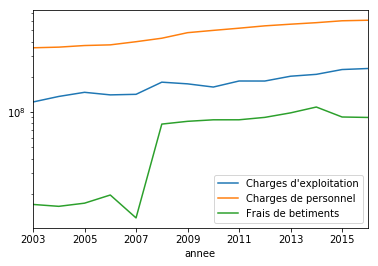

In [9]:
summ_uni = get_df_for_uni('EPFL')
summ_uni.plot(kind='line', logy = True)